C:\Users\aniru\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


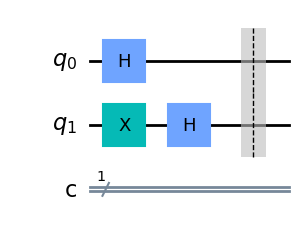

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline
circuit = QuantumCircuit(2,1)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.draw(output='mpl')

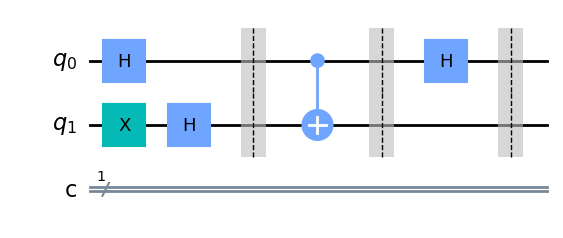

In [2]:
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

In [3]:
circuit.measure(0,0)

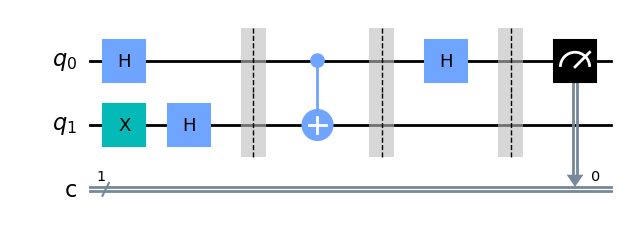

In [4]:
circuit.draw(output='mpl')

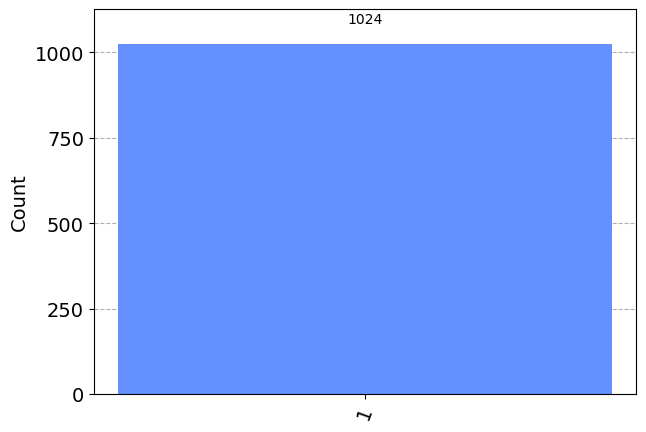

In [5]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=backend, shots=1024).result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [6]:
IBMQ.load_account()

C:\Users\aniru\AppData\Local\Temp\ipykernel_15012\485379158.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\aniru\AppData\Local\Temp\ipykernel_15012\485379158.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
provider = IBMQ.get_provider("ibm-q")

In [8]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} : {backend.status().pending_jobs} & {qubit_count} qubits")

ibmq_qasm_simulator : 0 & simulated qubits
simulator_statevector : 0 & simulated qubits
simulator_mps : 0 & simulated qubits
simulator_extended_stabilizer : 0 & simulated qubits
simulator_stabilizer : 0 & simulated qubits
ibm_brisbane : 94 & 127 qubits
ibm_kyoto : 3 & 127 qubits
ibm_osaka : 2 & 127 qubits


In [9]:
quantum_computer = provider.get_backend('ibm_osaka')

In [10]:
quantum_result = execute(circuit, backend=quantum_computer,shots=1024).result()

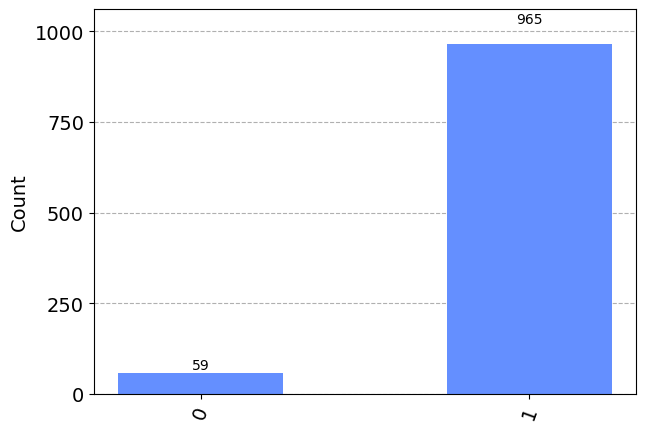

In [11]:
quantum_counts = quantum_result.get_counts(circuit)
plot_histogram([quantum_counts])